In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
# Colab 이미지 불러오기
from google.colab import files
myfile = files.upload()

Saving pollen.jpg to pollen.jpg


In [4]:
# P1C-Step1. e-campus에 첨부된 압축 폴더 중 [P1C]의 코드와 이미지를 먼저 다운로드하세요.
I = cv2.imread('pollen.jpg', cv2.IMREAD_GRAYSCALE)  # 이미지를 Gray Scale로 불러오기

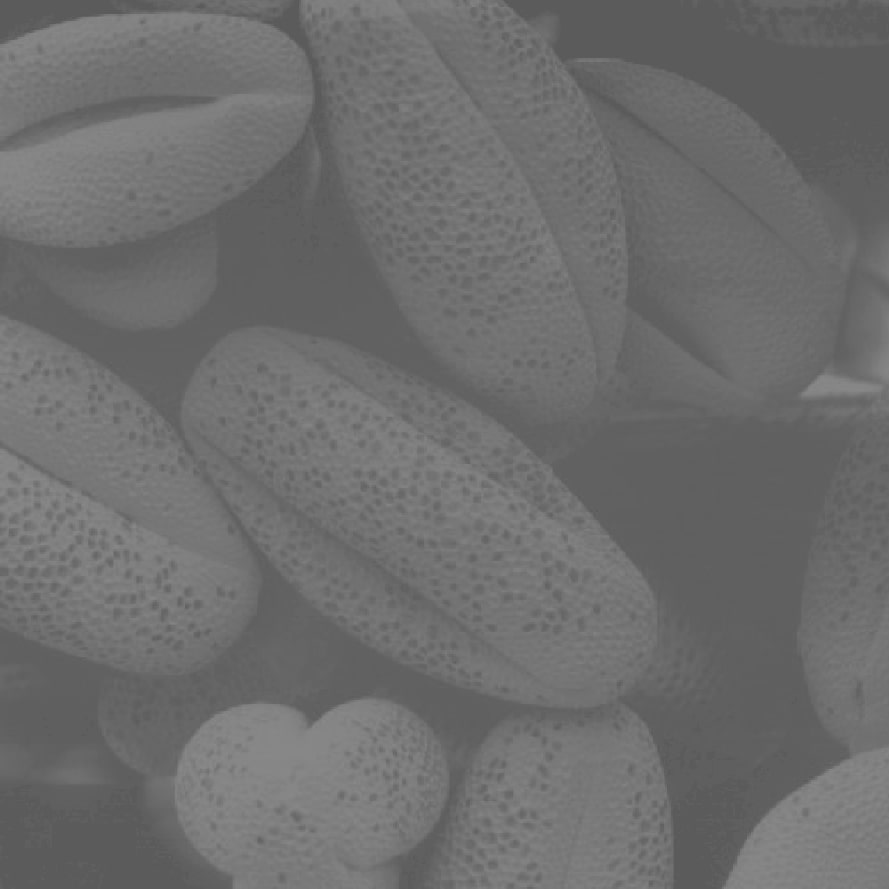

In [5]:
# cv2.imshow('image', I)     # 이미지 출력, jupyter notebook 사용자용
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# colab 사용자용 이미지 출력
# from google.colab import files
# from IPython import display
# display.Image(' 이미지 파일명 ')


from google.colab.patches import cv2_imshow # colab에서 cv2.imshow를 이용하기 위한 코드
cv2_imshow(I)

In [22]:
#print(np.histogram(I.flatten(),256,[0,256]))

In [13]:
# P1C-Step2. Histogram Equalization을 구현하여 다운받은 이미지에 대해 적용해보세요. 
hist, bins = np.histogram(I.flatten(),256,[0,256])                             # flatten 함수를 사용해서 2차원배열을 1차원으로 재배열 후 256개의 bin을 구함, hist는 도수, bin은 구분을 의미 
# print(hist)
# print(len(hist))
# print (I.shape)

pdf =  hist / ( 889 * 889 )                                                              # pdf 구하기, 여기 수정하세요
cdf = pdf.cumsum()                                                                    # cumsum은 CDF를 구하는 누적합 함수, cumsum 함수를 사용하세요
myHE = 255*cdf                                                                       # Histogram Equalizatioin을 하기 위해 255와 cdf를 곱하는 부분, 여기 수정하세요
myHE = myHE.astype('uint8')                                                   # floating point -> uint8
HE_I = myHE[I]                                                                 # HE 적용

#P1C-Step3. OpenCV의 Histogram Equalization 함수를 다운받은 이미지에 대해 적용해보세요. 
cv2_HE_I = cv2.equalizeHist(cv2.imread('pollen.jpg', cv2.IMREAD_GRAYSCALE))   # OpenCV에서 제공하는 HE 함수


Text(0.5, 1.0, 'Histogram (After HE-OpenCV)')

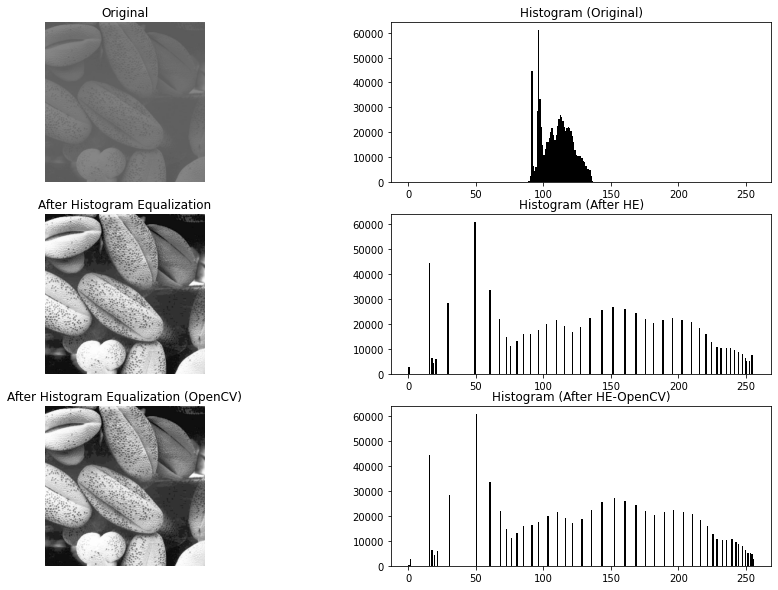

In [14]:
# plotting 하는 코드, 수정할 필요는 없습니다.
# P1C-Step4. step2&step3의 실험 결과와 원본 영상, histogram을 비교하여 보여주세요.
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2
  
ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)               # matplot 라이브러리의 imshow함수를 사용하여 영상을 보일경우, RGB 포맷으로 변환해주어야 함
ax1.imshow(I_RGB)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.hist(I.flatten(),256,[0,256], color = 'black')
ax2.set_title('Histogram (Original)')

ax3 = fig.add_subplot(rows, cols, 3)
HE_I_RGB = cv2.cvtColor(HE_I, cv2.COLOR_GRAY2RGB)
ax3.imshow(HE_I_RGB)
ax3.set_title('After Histogram Equalization')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
ax4.hist(HE_I.flatten(),256,[0,256], color = 'black')
ax4.set_title('Histogram (After HE)')

ax5 = fig.add_subplot(rows, cols, 5)
cv2_HE_I_RGB = cv2.cvtColor(cv2_HE_I, cv2.COLOR_GRAY2RGB)
ax5.imshow(cv2_HE_I_RGB, cmap='gray')
ax5.set_title('After Histogram Equalization (OpenCV)')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
ax6.hist(cv2_HE_I.flatten(),256,[0,256], color = 'black')
ax6.set_title('Histogram (After HE-OpenCV)')
